In [1]:
pip install --upgrade google-cloud-bigquery

Requirement already up-to-date: google-cloud-bigquery in /opt/conda/lib/python3.7/site-packages (1.24.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from google.cloud import bigquery
client = bigquery.Client()

In [3]:
sql = """
SELECT
  fog,
  COUNT(1) AS num_fog,
  AVG(mean_visibility) AS avg_mean_visibility
FROM
  publicdata.samples.gsod
WHERE
  year >= 2000 AND year <= 2010
  and mean_visibility is not null
GROUP BY
  fog
"""
df = client.query(sql).to_dataframe()
df.head()
#number of foggy days in US from 2000 to 2010 are 1990171
#average mean_visibility for days with and without fog is 6.97 and 10.56

,fog,num_fog,avg_mean_visibility
0,True,1990171,6.974599
1,False,23051100,10.569680


In [4]:
sql_1 = """
SELECT fog, COUNT(fog) AS num_fog, year
FROM
  publicdata.samples.gsod
WHERE
  year >= 2000 AND year <= 2010
group by fog, year
order BY
  num_fog desc, year desc
"""
df_1 = client.query(sql_1).to_dataframe()
df_1.head()

,fog,num_fog,year
0,False,3334594,2009
1,False,3227511,2008
2,False,3081257,2007
3,False,3023726,2006
4,False,2909381,2005


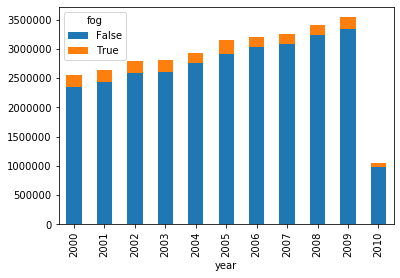

In [5]:
pivot_table = df_1.pivot(index='year', columns='fog', values='num_fog')
pivot_table.plot(kind='bar', stacked=True);
#it is more likely to have fog

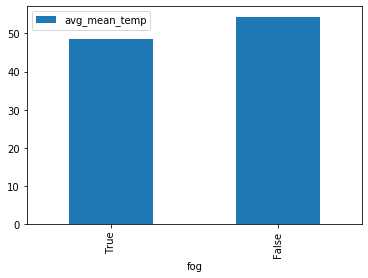

In [6]:
sql2 = """
SELECT fog,
  Avg(mean_temp) as avg_mean_temp
FROM
  publicdata.samples.gsod
WHERE
  year >= 2000 AND year <= 2010
group by fog
"""
df_2 = client.query(sql2).to_dataframe()
df_2.plot(x='fog', y='avg_mean_temp', kind='bar');
#average temperature is higher on foggy days

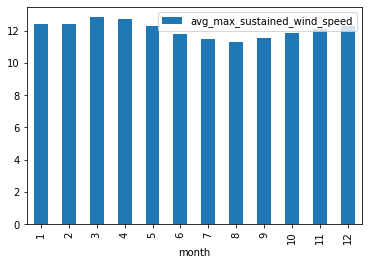

In [7]:
sql3 = """
SELECT month,
  Avg(max_sustained_wind_speed ) as avg_max_sustained_wind_speed 
FROM
  publicdata.samples.gsod
WHERE
  year >= 2000 AND year <= 2010
group by month
order by month asc
"""
df = client.query(sql3).to_dataframe()
df.plot(x='month', y='avg_max_sustained_wind_speed', kind='bar');